In [49]:
# Importing the required Libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import sklearn as skplt

In [4]:
#Reading the Iris Dataset

df = pd.read_csv(r'C:\Users\Vineeth_Infor\Desktop\Data Science\iris.csv')


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.ndim

2

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [11]:

df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [13]:
df['Species'].nunique()

3

In [14]:
print(df.keys())

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [18]:
pip install pingouin

  Using cached pingouin-0.4.0-py3-none-any.whl
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached littleutils-0.2.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pingouin as pg

In [20]:
def plot_num(a):
    fig,axes=plt.subplots(3,2,figsize=(10,12))
    sns.histplot(x=df[a],kde=True,bins=10,ax=axes[0][0],palette='Pastel1')
    pg.qqplot(df[a],dist='norm',ax=axes[0][1])
    sns.barplot(x=df.Species,y=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df.Species,y=df[a],ax=axes[1][1],palette='Pastel1')
    sns.boxplot(y=df[a],x=df.Species,hue='Species',data=df,ax=axes[2][0],palette='Pastel1')
    sns.violinplot(y=df[a],x=df.Species,hue='Species',data=df,ax=axes[2][1],palette='Pastel1')
    plt.suptitle(a.title())
    plt.show()

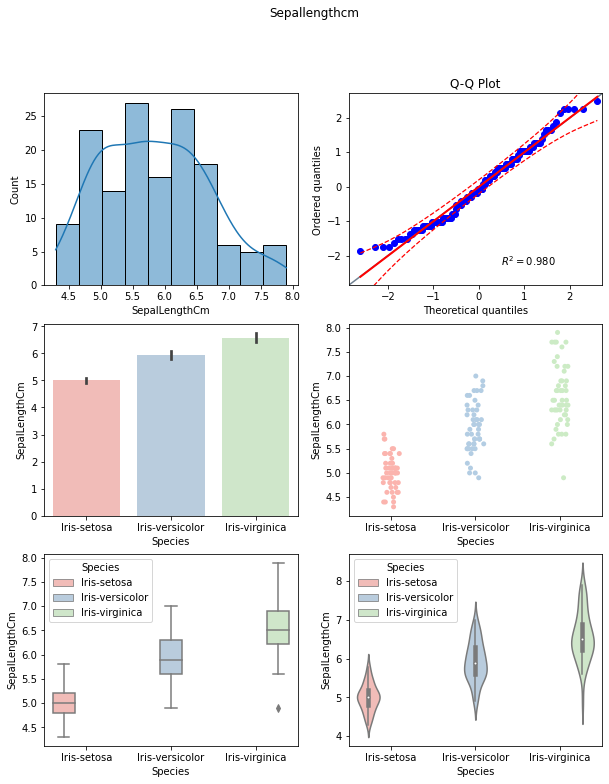

In [21]:
plot_num('SepalLengthCm')

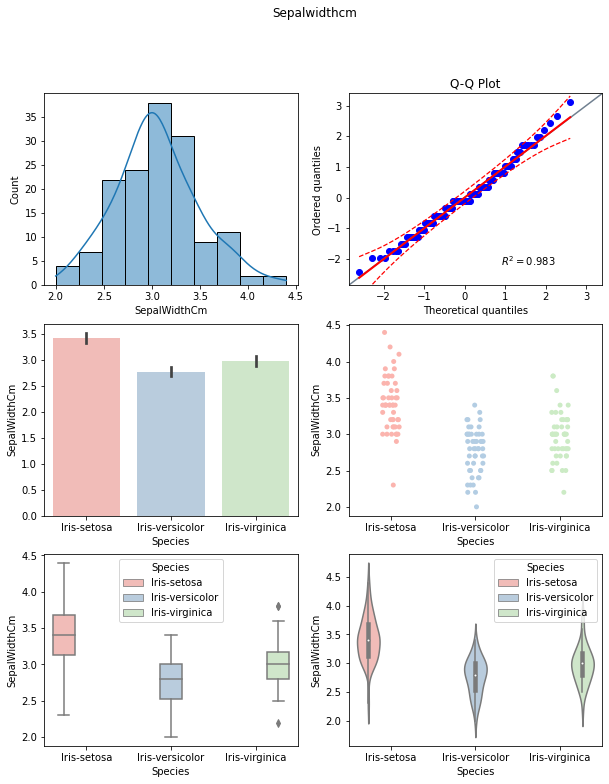

In [22]:

plot_num('SepalWidthCm')

In [23]:
def plot_cat(a):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    df[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=df[a],shadow = True,
startangle = 180,autopct='%.0f%%',ax=axes[0][0])
    df[a].value_counts().plot.bar(ax=axes[0][1])
    sns.scatterplot(x=df.PetalWidthCm ,y=df.SepalWidthCm,hue=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df[a],y=df.PetalWidthCm,hue=df.SepalWidthCm,ax=axes[1][1],palette='Pastel1')
    fig.suptitle("Count of"+a.title())
    plt.show()

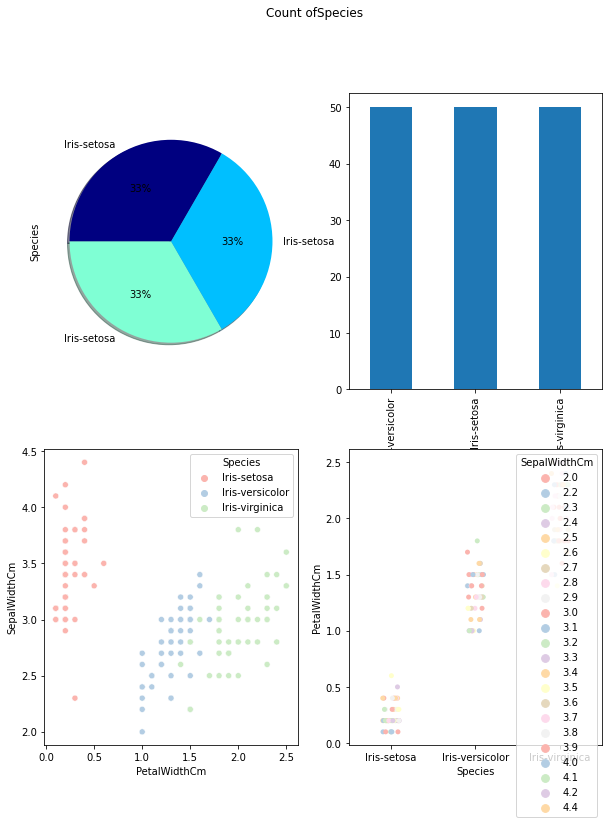

In [24]:
plot_cat('Species')

In [25]:
def plot_cat(a):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    df[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=df[a],shadow = True,
startangle = 180,autopct='%.0f%%',ax=axes[0][0])
    df[a].value_counts().plot.bar(ax=axes[0][1])
    sns.scatterplot(x=df.PetalLengthCm ,y=df.SepalLengthCm,hue=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df[a],y=df.PetalLengthCm,hue=df.SepalLengthCm,ax=axes[1][1],palette='Pastel1')
    fig.suptitle("Count of"+a.title())
    plt.show()

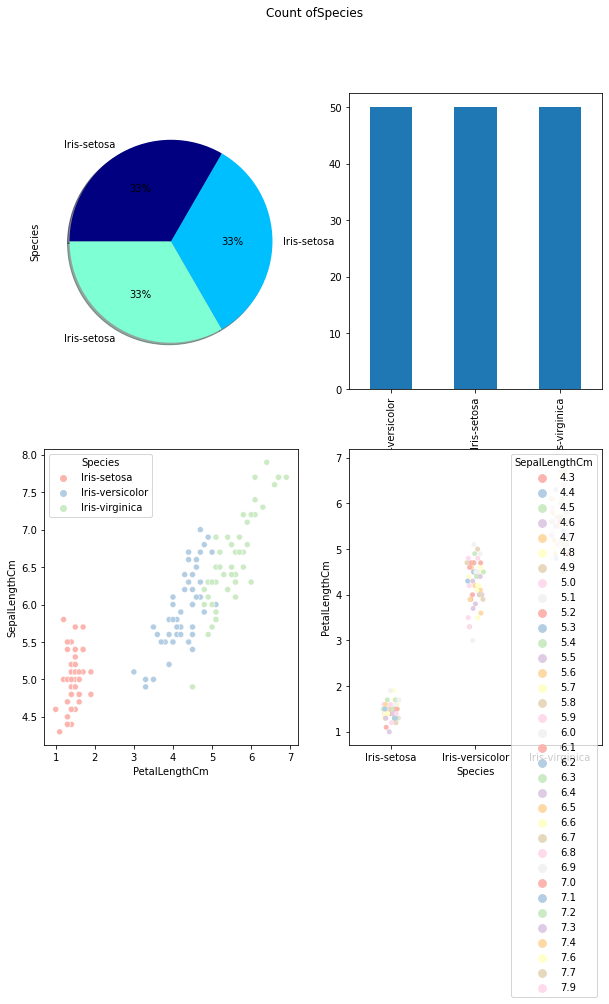

In [26]:
plot_cat('Species')

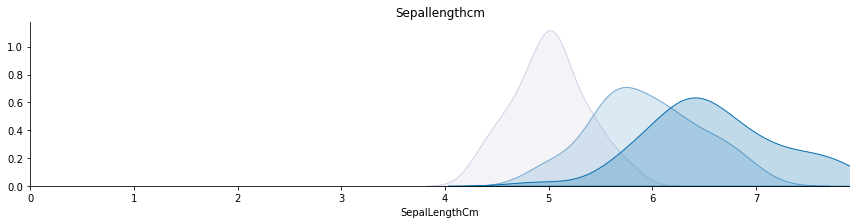

In [27]:

def plot_kde(a):
    facet=sns.FacetGrid(df,hue='Species',aspect=4,palette='PuBu')
    facet.map(sns.kdeplot,a,shade=True)
    facet.set(xlim=(0,df[a].max()))
    plt.title(a.title())
    plt.show()

plot_kde('SepalLengthCm')

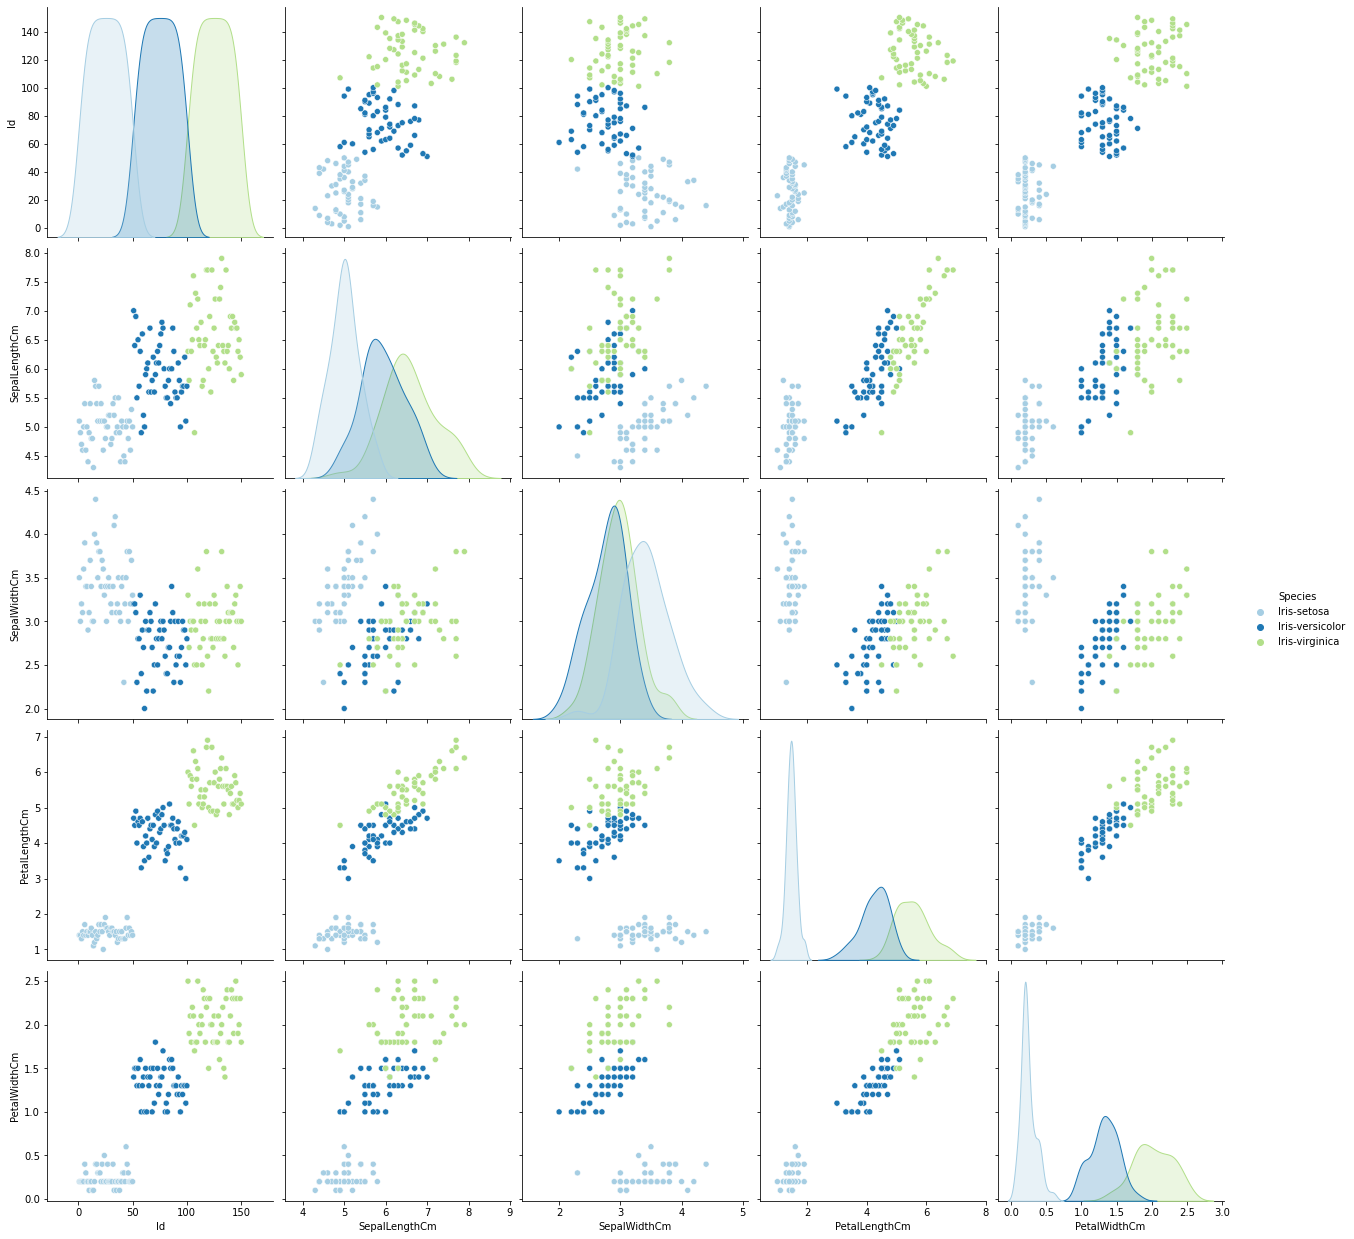

In [28]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Species',height=3.5)
plt.show()

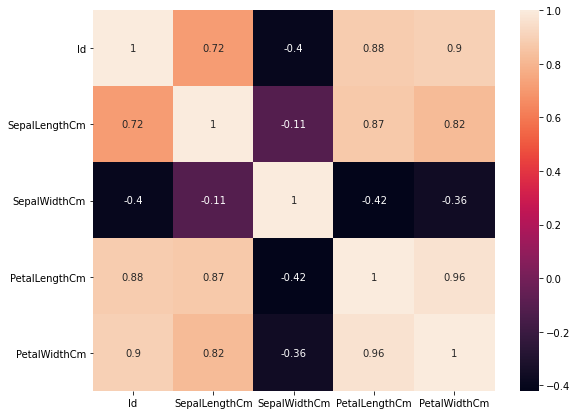

In [29]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

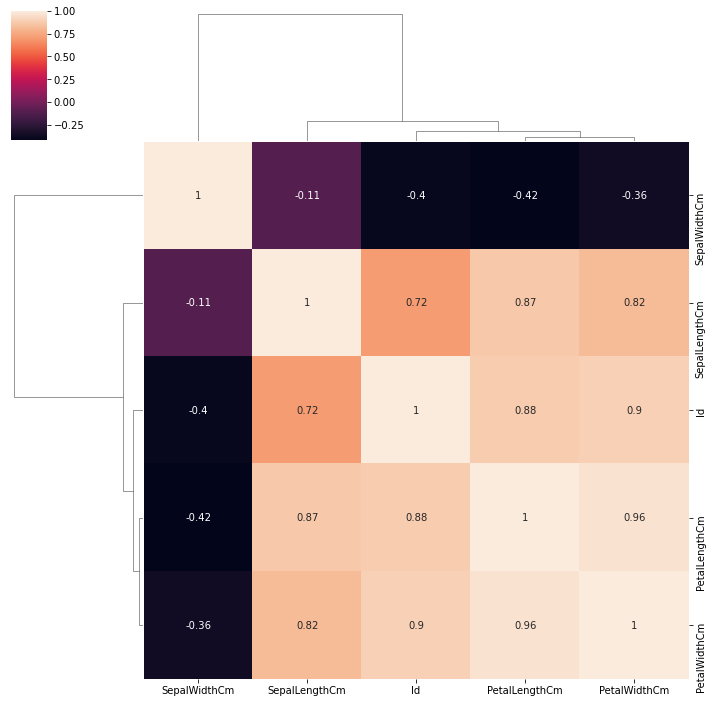

In [30]:
sns.clustermap(df.corr(),annot=True)

In [31]:
#priting samples and target 
X = df.values[:, 0:4] 
y = df.values[:,-1]

In [32]:

X[:5]

array([[1, 5.1, 3.5, 1.4],
       [2, 4.9, 3.0, 1.4],
       [3, 4.7, 3.2, 1.3],
       [4, 4.6, 3.1, 1.5],
       [5, 5.0, 3.6, 1.4]], dtype=object)

In [34]:
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [35]:
#Split and Train model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [36]:
#Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

In [37]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data Set Accuracy:  1.0
Validation Mean F1 Score:  0.9832679738562092
Validation Mean Accuracy:  0.9833333333333334


[Text(133.92000000000002, 181.2, 'X[3] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 100.5\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

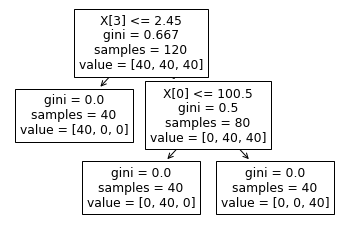

In [38]:

from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
tree.plot_tree(tree_clf)

In [39]:
text_representation = tree.export_text(tree_clf)

print(text_representation)

|--- feature_3 <= 2.45
|   |--- class: Iris-setosa
|--- feature_3 >  2.45
|   |--- feature_0 <= 100.50
|   |   |--- class: Iris-versicolor
|   |--- feature_0 >  100.50
|   |   |--- class: Iris-virginica



In [40]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [41]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
y_pred=tree_clf.predict(X_test)

print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 1.0


In [44]:
# CONFUSION MATRIX


confusion_matrix(y_test, y_pred)


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [46]:

print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

